In [2]:
import pandas as pd

In [3]:
! pip install spacy
! pip install pandas
! pip install en_core_web_sm


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import spacy
import en_core_web_sm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = pd.read_csv('india-news-headlines.csv')


In [6]:
df

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [7]:
df_time_period = df[(df["publish_date"]>20130000) & (df["publish_date"]<20140516)]
df_time_period

,publish_date,headline_category,headline_text
1531086,20130101,life-style.food.recipes,Appetizer recipe: Corn & Basil Fingers
1531087,20130101,life-style.relationships.man-woman,Men taking to cooking like never before
1531088,20130101,life-style.health-fitness.health-news,Theatre can be therapeutic
1531089,20130101,unknown,Should you buy a resale flat?
1531090,20130101,life-style.relationships.man-woman,How to not get raped
...,...,...,...
1879111,20140515,city.bhopal,Inaugural of event to mark birth anniversary o...
1879112,20140515,entertainment.events.bhopal,Play Drishtidaan staged at the third day of Ra...
1879113,20140515,city.bhopal,Play Drishtidaan staged at the third day of Ra...
1879114,20140515,entertainment.events.bhopal,A city-based band; Bandishein performs at Rabi...


In [8]:
f = open('political_cats.txt', 'r')

textblob = f.read()
cats = textblob.split("\n")

In [9]:
relevant_df = df_time_period[ df_time_period['headline_category'].isin(cats)]

In [10]:
relevant_df

,publish_date,headline_category,headline_text
1531135,20130101,india,How can we trust this government; questions Ni...
1531146,20130101,india,Rapper's concert scrapped after online protest...
1531162,20130101,india,Govt prunes cash transfers to 20 districts fro...
1531173,20130101,india,Delhi gang-rape case: Grieving family says mar...
1531174,20130101,india,Delhi gang-rape case: 80 witnesses in chargesheet
...,...,...,...
1879009,20140515,india,Gadkari was never focus of our probe; I-T depa...
1879013,20140515,india,Narendra Modi chairs Gujarat cabinet meeting; ...
1879018,20140515,india,Average Indian male consumes 33 litres of alco...
1879024,20140515,india,Sulking Sushma flies to Bhopal says not angry


In [11]:
series = df.groupby("headline_category")["headline_category"].count()
# df.groupby('News Portal')['Positive Sentiment Score'].median()

series = series.sort_values()

print(series)
series.to_csv("Cat Counts.csv")

headline_category
young-turks                                   8
nepal-india-earthquake.opinion                8
sports.rio-2016-olympics.news.sailing         8
himachal-pradesh                              8
best-products.beauty.grooming                 8
                                          ...  
business.india-business                  121195
city.delhi                               137648
city.mumbai                              150451
unknown                                  209583
india                                    297491
Name: headline_category, Length: 1041, dtype: int64


In [12]:
cate = pd.read_csv("Cat Counts.csv")

cate[cate["headline_category.1"] == cate["headline_category.1"].max()]

,headline_category,headline_category.1
1040,india,297491


In [13]:
relevant_df

,publish_date,headline_category,headline_text
1531135,20130101,india,How can we trust this government; questions Ni...
1531146,20130101,india,Rapper's concert scrapped after online protest...
1531162,20130101,india,Govt prunes cash transfers to 20 districts fro...
1531173,20130101,india,Delhi gang-rape case: Grieving family says mar...
1531174,20130101,india,Delhi gang-rape case: 80 witnesses in chargesheet
...,...,...,...
1879009,20140515,india,Gadkari was never focus of our probe; I-T depa...
1879013,20140515,india,Narendra Modi chairs Gujarat cabinet meeting; ...
1879018,20140515,india,Average Indian male consumes 33 litres of alco...
1879024,20140515,india,Sulking Sushma flies to Bhopal says not angry


In [14]:

nlp = en_core_web_sm.load()

texts = ''.join(str(relevant_df.headline_text.tolist()))

nodes = []
entities = ["ORG", "PERSON", "NORP", "EVENT", "LAW"]



In [15]:
print(len(nodes))

0


In [16]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax

MODEL = f"cardiffnlp/xlm-twitter-politics-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)



In [17]:
relevant_df["Positive Sentiment Score"] = 0
relevant_df["Neutral Sentiment Score"] = 0
relevant_df["Negative Sentiment Score"] = 0

/var/folders/4p/rylg4l1j585g32zrfkvlzbgh0000gn/T/ipykernel_32580/3015169735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df["Positive Sentiment Score"] = 0
/var/folders/4p/rylg4l1j585g32zrfkvlzbgh0000gn/T/ipykernel_32580/3015169735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df["Neutral Sentiment Score"] = 0
/var/folders/4p/rylg4l1j585g32zrfkvlzbgh0000gn/T/ipykernel_32580/3015169735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [18]:
for index, row in relevant_df.iterrows():
  text = row["headline_text"]
  encoded_input = tokenizer.encode(text, padding=True, truncation=True,max_length=50, add_special_tokens = True, return_tensors='pt')

  output = model(encoded_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

  relevant_df.at[index,"Negative Sentiment Score"] = scores[0]
  relevant_df.at[index,"Neutral Sentiment Score"] = scores[1]
  relevant_df.at[index,"Positive Sentiment Score"] = scores[2]

  # ranking = np.argsort(scores)
  # for i in range(scores.shape[0]):
  #   s = scores[ranking[i]]
  #   if i==0:
  #     relevant_df.at[index,"Positive Sentiment Score"] = s
  #   if i==1:
  #     relevant_df.at[index,"Neutral Sentiment Score"] = s
  #   if i==2:
  #     relevant_df.at[index,"Negative Sentiment Score"] = s

In [35]:
relevant_df

,publish_date,headline_category,headline_text,Positive Sentiment Score,Neutral Sentiment Score,Negative Sentiment Score
1531135,20130101,india,How can we trust this government; questions Ni...,0.056896,0.231769,0.711335
1531146,20130101,india,Rapper's concert scrapped after online protest...,0.021105,0.316950,0.661945
1531162,20130101,india,Govt prunes cash transfers to 20 districts fro...,0.024519,0.251840,0.723641
1531173,20130101,india,Delhi gang-rape case: Grieving family says mar...,0.031571,0.572259,0.396170
1531174,20130101,india,Delhi gang-rape case: 80 witnesses in chargesheet,0.031713,0.773234,0.195052
...,...,...,...,...,...,...
1879009,20140515,india,Gadkari was never focus of our probe; I-T depa...,0.056082,0.756772,0.187146
1879013,20140515,india,Narendra Modi chairs Gujarat cabinet meeting; ...,0.157924,0.819390,0.022687
1879018,20140515,india,Average Indian male consumes 33 litres of alco...,0.042205,0.890784,0.067011
1879024,20140515,india,Sulking Sushma flies to Bhopal says not angry,0.037980,0.097934,0.864085


In [34]:
print(relevant_df.groupby('publish_date')['Positive Sentiment Score'].mean())
print(relevant_df.groupby('publish_date')['Negative Sentiment Score'].mean())
print(relevant_df.groupby('publish_date')['Neutral Sentiment Score'].mean())

publish_date
20130101    0.185807
20130102    0.206894
20130103    0.221798
20130104    0.212527
20130105    0.221805
              ...   
20140511    0.222571
20140512    0.230496
20140513    0.246406
20140514    0.277278
20140515    0.245021
Name: Positive Sentiment Score, Length: 500, dtype: float64
publish_date
20130101    0.432581
20130102    0.344172
20130103    0.379897
20130104    0.376734
20130105    0.347244
              ...   
20140511    0.386243
20140512    0.366071
20140513    0.398508
20140514    0.342555
20140515    0.341550
Name: Negative Sentiment Score, Length: 500, dtype: float64
publish_date
20130101    0.381612
20130102    0.448935
20130103    0.398305
20130104    0.410739
20130105    0.430950
              ...   
20140511    0.391186
20140512    0.403433
20140513    0.355087
20140514    0.380167
20140515    0.413429
Name: Neutral Sentiment Score, Length: 500, dtype: float64


In [38]:
! python3 -m spacy download en_core_web_sm -q

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
relevant_df["Entities"] = ""
relevant_df["Relations"] = ""
from spacy.matcher import Matcher 
from spacy.tokens import Span 

def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1",[pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

/var/folders/4p/rylg4l1j585g32zrfkvlzbgh0000gn/T/ipykernel_30729/934228981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df["Entities"] = ""
/var/folders/4p/rylg4l1j585g32zrfkvlzbgh0000gn/T/ipykernel_30729/934228981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df["Relations"] = ""


In [41]:
nlp = en_core_web_sm.load()
total_nodes = []
entities = ["ORG", "PERSON", "NORP", "EVENT", "LAW", "MONEY"]
edge_info = []
node_dict = dict()


for index, row in relevant_df.iterrows():
    print(index)
    nodes = []

    article = nlp(row["headline_text"])

    for x in article.ents:
        if x.label_ in entities:
            nodes.append(x.text)
        if not node_dict.get(x.text):
            node_dict[x.text] = {"Positive Sentiment Score": row["Positive Sentiment Score"], 
                                 "Neutral Sentiment Score": row["Neutral Sentiment Score"],
                                 "Negative Sentiment Score": row["Negative Sentiment Score"],
                                 "count": 1}
        else:
            node_dict[x.text]["Positive Sentiment Score"] = node_dict[x.text]["Positive Sentiment Score"]+ row["Positive Sentiment Score"]
            node_dict[x.text]["Neutral Sentiment Score"] = node_dict[x.text]["Neutral Sentiment Score"]+ row["Neutral Sentiment Score"]
            node_dict[x.text]["Negative Sentiment Score"] = node_dict[x.text]["Negative Sentiment Score"]+  row["Negative Sentiment Score"]
            node_dict[x.text]["count"] = node_dict[x.text]["count"]+1
        
    
    relevant_df.at[index,"Entities"] = nodes
    relation = get_relation( row["headline_text"])

    relevant_df.at[index,"Relations"] = relation

    total_nodes = total_nodes+ nodes

    for i in range(len(nodes)):
        for j in range(i+1,len(nodes)):
            edge_info.append( ( nodes[i] , nodes[j]  ))

    

1531135
1531146
1531162
1531173
1531174
1531181
1531187
1531210
1531211
1531212
1531213
1531214
1531215
1531216
1531218
1531219
1531220
1531222
1531223
1531224
1531225
1531226
1531227
1531228
1531229
1531230
1531231
1531232
1531233
1531234
1531235
1531237
1531240
1531241
1531242
1531243
1531244
1531245
1531246
1531247
1531248
1531249
1531250
1531251
1531252
1531253
1531256
1531271
1531279
1531287
1531295
1531303
1531306
1531310
1531315
1531323
1531328
1531338
1531355
1531358
1531363
1531374
1531386
1531391
1531394
1531396
1531420
1531430
1531434
1531437
1531498
1531507
1531528
1531571
1531573
1531587
1531589
1531595
1531616
1531626
1531634
1531635
1531639
1531646
1531649
1531709
1531715
1531716
1531720
1531727
1531733
1531750
1531751
1531773
1531776
1531799
1531801
1531803
1531843
1531864
1531867
1531868
1531875
1531880
1531881
1531883
1531885
1531887
1531889
1531906
1531908
1531909
1531910
1531911
1531912
1531913
1531914
1531915
1531917
1531918
1531919
1531920
1531921
1531922
1531923


In [42]:
relevant_df.to_csv("check.csv")

In [1]:
relevant_df

NameError: name 'relevant_df' is not defined

In [43]:
print(len(set(total_nodes)))

6205


In [44]:
len(edge_info)

12001

In [45]:
len(node_dict)

9226

In [46]:
for n in total_nodes:
  node_dict[n]["Average Positive Sentiment Score"] = node_dict[n]["Positive Sentiment Score"]/node_dict[n]["count"]
  node_dict[n]["Average Neutral Sentiment Score"] = node_dict[n]["Neutral Sentiment Score"]/node_dict[n]["count"]
  node_dict[n]["Average Negative Sentiment Score"] = node_dict[n]["Negative Sentiment Score"]/node_dict[n]["count"]

In [47]:
graph_nodes = []
edges =[]

In [48]:
for n in set(total_nodes):
  graph_nodes.append((n, node_dict[n]['Average Positive Sentiment Score'],node_dict[n]['Average Neutral Sentiment Score'],node_dict[n]['Average Negative Sentiment Score']))

In [49]:
for e in edge_info:
  n1 = (e[0],node_dict[e[0]]['Average Positive Sentiment Score'],node_dict[e[0]]['Average Neutral Sentiment Score'],node_dict[e[0]]['Average Negative Sentiment Score'])
  n2 = (e[1],node_dict[e[1]]['Average Positive Sentiment Score'],node_dict[e[1]]['Average Neutral Sentiment Score'],node_dict[e[1]]['Average Negative Sentiment Score'])
  edges.append((n1,n2))

In [50]:
import networkx as nx
G = nx.Graph()

In [51]:
for n in graph_nodes:
  G.add_node(n)

In [52]:
G.add_edges_from(edges)

In [21]:
import pickle

In [ ]:


# save graph object to file
pickle.dump(G, open('ToIGraph.pickle', 'wb'))



In [ ]:
import matplotlib.pyplot as plt



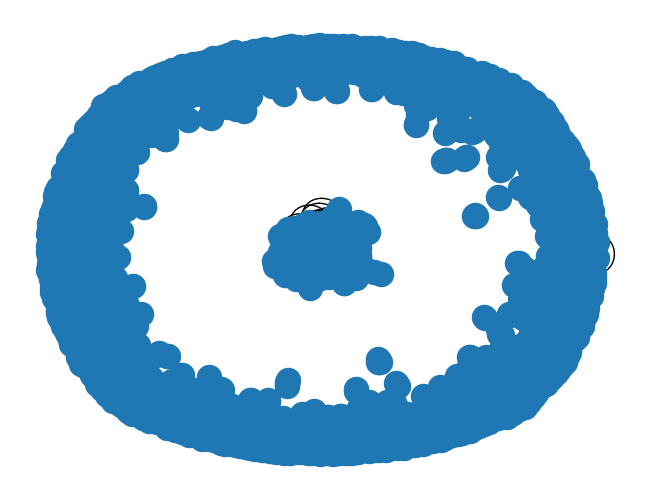

In [54]:
nx.draw(G)

In [22]:
# load graph object from file
import pickle
graph = pickle.load(open('ToIGraph.pickle', 'rb'))

In [29]:
list(graph.edges)
import networkx as nx
new_edges =  list()

for edge in list(graph.edges):
    node1 = edge[0][0]
    node2 = edge[1][0]
    new_edges.append( (node1, node2))

new_edges

only_names_graph = nx.Graph()

only_names_graph.add_edges_from(new_edges)

In [31]:
only_names_graph.edges

pickle.dump(only_names_graph, open('ToIGraph-names.pickle', 'wb'))